In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [17]:
import numpy as np
from sklearn.gaussian_process import GaussianProcess
from pyearth.earth import Earth

class FeatureExtractor(object):

    def __init__(self, model='earth', colname='spectra', num_bins=64, ts_length=120):
        self.colname = colname
        self.num_bins = num_bins
        self.ts_length = ts_length
        self.model = model

    def fit(self, X_df, y=None):
        pass

    def transform(self, X_df):
        X = []
        for i, y_ts in enumerate(X_df[self.colname]):
            #bins = np.linspace(y_ts.min(), y_ts.max(), self.num_bins + 1)
            #y_ts  = binify(bins, y_ts)
            x_ts = np.linspace(0, 1, len(y_ts))
            if self.model == 'earth':
                model = Earth(
                  penalty=0.3,
                  max_terms=10,
                  thresh=0,
                  smooth=True,
                  check_every=5,
                  max_degree=10)
            elif self.model == 'gp':
                model = GaussianProcess(theta0=200)
            model.fit(x_ts[:, None], y_ts)

            t = np.linspace(0, 1, self.ts_length)
            y = model.predict(t[:, None])            
            amplitude = max(y) - min(y)
            y /= amplitude
            x_new = []
            x_new.append(amplitude)
            for p in y:
                x_new.append(p)
            X.append(x_new)
        return np.array(X)

def binify(bins, a):
    a_dig = np.digitize(a, bins) - 1
    not_empty_bins = np.unique(a_dig)
    a_bin = np.array([np.mean(a[a_dig == i]) for i in not_empty_bins])
    return a_bin

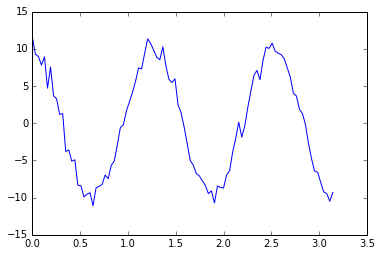

In [12]:
import pandas as pd

np.random.seed(1)
t = np.linspace(0, np.pi, 100)
s = 10*np.cos(t*5) + np.random.normal(0, 1, size=len(t))

X_dict = [
    {'spectra': s}
]
X_df = pd.DataFrame(X_dict)
plt.plot(t, s)

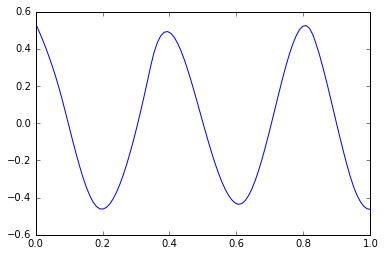

In [15]:
fe = FeatureExtractor(ts_length=100)
fe.fit(X_df)
X = fe.transform(X_df)
plt.plot(np.linspace(0, 1, X.shape[1] - 1), X[0, 1:])